<div id="container" style="position:relative;">
<div style="float:left"><h1> Model Evaluation</h1></div>
<div style="position:relative; float:right"><img style="height:65px" src ="https://drive.google.com/uc?export=view&id=1EnB0x-fdqMp6I5iMoEBBEuxB_s7AmE2k" />
</div>
</div>

## Classification Model Evaluation

In [238]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

### Accuracy as a Metric

Accuracy is a great metric to evaluate models, but it has its downfalls. In particular, it is not very informative when we have imbalanced classes, as we'll see in the next section.

### Accuracy With Imbalanced Classes 

It is often the case with binary variables that one class is more common than the other. Imagine predicting the occurrence of very rare disease or detecting credit card fraud. 

Of all the data points, only a small fraction will belong to the *positive* class, the positive class being the event or attribute of interest we are trying to detect.\
**NOTE**: Don't conflate `positive class` as any class that is "positive" in nature. Remember, it always denotes the event that we are trying to predict/detect.

We will be looking at an example of detecting fraud in credit card transactions. 

The following data comes from [Kaggle](https://www.kaggle.com/mlg-ulb/creditcardfraud). The features in this case are not named due to the confidentiality of the source data set (they are principal components that have already been retrieved) but we can see if we can build a good classifier based on these nonetheless.

You can download the data [here](https://drive.google.com/open?id=1ofvvsHSaScHiK7B3Qtbt_nVqaN4Zju4w). 

In [240]:
credit = pd.read_csv('data/creditcard.csv')
credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [241]:
credit.shape

(284807, 31)

As we can see, the data has 284,807 transactions, 30 features and the last column is the target. Let's separate our data accordingly. 

In [242]:
X = credit.drop(columns="Class")
y = credit["Class"]

In [243]:
y.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In this data set, only 492 of the total 284,807 transactions are fraudulent. Thats only 0.17%! This is an example of a data set with highly imbalanced classes, or, more generally speaking, a highly imbalanced classification problem.

Let's fit a logistic regression to predict fraudulent transactions, and see how the model performs.

In [244]:
# Create a train/test split with 70% train, 30% test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

In [245]:
from sklearn.linear_model import LogisticRegression

# 1. Instantiate model
credit_logit = LogisticRegression(solver='lbfgs', random_state=1, max_iter=10000)

# 2. Fit model
credit_logit.fit(X_train, y_train);

In [246]:
# 3. Score model
print(f'Score on train: {credit_logit.score(X_train, y_train)}')
print(f'Score on test: {credit_logit.score(X_test, y_test)}')

Score on train: 0.9991773840813788
Score on test: 0.999133925541004


We get 99% accuracy on both the train and test set. Terrific! But is it?

Let's dive deeper into our results. In binary classification, there are four possible outcomes to making a prediction:

1. **True Positive (TP)**: Correctly predict that $x$ belongs to class 1/positive class
2. **False Positive (FP)**: Incorrectly predict that $x$  belongs to class 1/positive class
3. **True Negative (TN)**: Correctly predict $x$'s membership in class 0/negative class 
4. **False Negative (FN)**: Incorrectly predict $x$'s membership in class 0/negative class





If we put these outcomes in a matrix, we arrive at what is known as a confusion matrix:

|     |  Predicted Class 0 |   Predicted Class 1 | 
| --------- |:---:|:---:|
|True Class 0 |**TN** | **FP** | 
|True Class 1 |**FN** |**TP** | 

For example, say we have a model that predicts whether or not it will rain today.\
Our label / response variable is `rain`\
Let's make `rain` as our positive class (i.e., class 1) and `not rain` as our negative class (i.e., class 0)

1. **TP:** Model predicts = `rain`, Label = `rain`
2. **FP:** Model predicts = `rain`, Label = `not rain`
3. **TN:** Model predicts = `not rain`, Label = `not rain`
4. **FN:** Model predicts = `not rain`, Label = `rain`

Using these definitions, accuracy can be written as:

$$Accuracy = \frac{\text{# correct predictions}}{\text{# all predictions}}= \frac{TN+TP}{TN+FP+FN+TP}$$

For our example, we can get the confusion matrix using the `confusion_matrix` function in the `metrics` module of `sklearn`. This function returns the matrix as a numpy array but it often best to plot the results as a heatmap which can be done directly by the `ConfusionMatrixDisplay.from_estimator` function.

In [248]:
cf_matrix

array([[85293,    15],
       [   59,    76]])

In [247]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get class predictions
y_pred = credit_logit.predict(X_test)

# Generate confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# label rows and columns
cf_df = pd.DataFrame(
    cf_matrix, 
    columns=["Predicted Non-fraudulent", "Predicted Fraudulent"],
    index=["True Non-fraudulent", "True Fraudulent"]
)

display(cf_df)

,Predicted Non-fraudulent,Predicted Fraudulent
True Non-fraudulent,85293,15
True Fraudulent,59,76


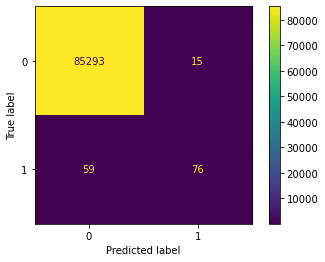

In [249]:
# the function expects the estimator, inputs and target as parameters
disp = ConfusionMatrixDisplay.from_estimator(credit_logit, X_test, y_test);


Let's interpret these numbers, specifically the first row of the confusion matrix first:
* **TN**: The vast majority of data points are from class 0 (the negative class) that were correctly predicted as legitimate transactions
* **FP**: There was a small number of legitimate transactions that we incorrectly classified as fraudulent

Looking at the second column of the confusion matrix:

* **FN**: how many fraudulent transactions were predicted as legitimate?

In [261]:
# select the FP from the confusion matrix
# true label 0 & predicted label 1
fp = cf_matrix[0, 1]

print(f"{fp} legitimate transactions were misclassified as fradulent.")

15 legitimate transactions were misclassified as fradulent.


* **TP**: If our goal is to identify as many of the frauds as possible, and measure how well we achieved that goal, we need to look at the number of true positives versus the total number of frauds.

In [262]:
# select the TP from the confusion matrix
# true label 1 & predicted label 1
tp = cf_matrix[1, 1]

# total number of true label 1
num_frauds = cf_matrix[1, :].sum()

print(f"{tp} fraudulent transactions were predicted correctly by the model out of {num_frauds} frauds.")

76 fraudulent transactions were predicted correctly by the model out of 135 frauds.


Compare this with the fact that the model has ~99% accuracy and note that we are still missing around half the fraudulent activity.

### Precision and Recall

Because of the fact that accuracy alone can be misleading depending on the class balance of the data, alternative metrics consider the relative proportions of correct and incorrect classifications in both the positive and negative classes. Two of the most common are *precision* and *recall*. 

Precision measures what proportion of a model assigned to positive are actually members of the positive class:

$$Precision = \frac{TP}{TP+FP}$$

On the other hand, recall measures how many members of the positive class the model correctly identified out of the total positives:

$$Recall = \frac{TP}{TP+FN}$$

So, what are the actual uses of these values? 

Because both of these scores must be between zero and one, we can look at precision and recall from a probabilistic view. Say our model determined a set of points $X$ were members of the class. Let's select a random member $x$ of $X$. 

The precision is the probability that $x$ is actually a member of the class. It is a measure of how focused our model is. With a high precision we can be confident points our model identifies as belonging to a class do actually belong to a class. 

For recall, consider a random point $y$ taken from all of the data points that are in the class. Recall is the probability $y$ is a member of $X$, that is the probability a random point in the class is correctly found by our model. With a high recall we can be confident our model is not missing many class members.

<center>
<img src="https://drive.google.com/uc?export=view&id=12_-4nTpurMy5MBZcA0VptLjB1dt9GfN2" width = 700/>
</center>

In the above image, there are 10 data points in total. Of the 10 data points, 7 were correctly classified.

$$Accuracy = \frac{7}{10} = 70\%$$

We got 3 misclassifications and we might further care where those misclassifications were made.

If we really care about predicting the positive class, we want to know how precise we are when we claim something is part of that class. Precision measures exactly that. 

$$Precision = \frac{3}{5} = 60\%$$

Of all 5 data points that we claim are part of class 1, 3 were actually class 1 and predicted correctly. 

We can also look at the entire positive class and see how many data points we correctly classified as being part of that positive class. 

$$Recall = \frac{3}{4} = 75\%$$

In total, there are 4 data points that actually belong to class 1. Of those 4, we predicted 3 as being a part of class 1. In other words, the metric recall measures how many class 1 data points our model managed to recall as class 1.

We now have a bit more insight into the quality of our predictions. 

### More examples 
### What does this mean in our example?
**Precision:** Out of all of the fraudulent PREDICTIONS, how many did the model correctly identify as fraudulent? 76/(76+15)\
**Recall:** Out of all of the fraudulent EXAMPLES (135 in total), how many did the model correctly identify as fraudulent? 76/(76+59)


Say you went fishing in a pond with only fish and rocks. \
You cast wide net, and caught 160 objects in total. \
You catch 80 of 100 total fish in a lake. That's 80% recall. \
But you also get 80 rocks in your net. That means 50% precision, half of the net's contents is junk. \
You could use a smaller net and target one pocket of the lake where there are lots of fish and no rocks, but you might only get 20 of the fish in order to get 0 rocks. That is 20% recall and 100% precision.

### Back to Our Example ###

Let's calculate precision and recall on our credit card frauds model. Remember that our logistic regression model resulted in the following confusion matrix:

In [50]:
display(cf_df)

,Predicted Non-fraudulent,Predicted Fraudulent
True Non-fraudulent,85293,15
True Fraudulent,59,76


We can calculate our precision and recall using the formulas from above:

In [252]:
tp = cf_matrix[1, 1]
predicted_fraud = cf_matrix[:, 1].sum()

precision = tp/predicted_fraud

print(f"Precision = {tp}/{predicted_fraud} = {round(precision*100, 2)}%")

Precision = 76/91 = 83.52%


In [253]:
tp = cf_matrix[1, 1]
true_fraud = cf_matrix[1, :].sum()

recall = tp/true_fraud

print(f"Recall = {tp}/{true_fraud} = {round(recall*100, 2)}%")

Recall = 76/135 = 56.3%


The same calculation is carried out by the `precision_score` and `recall_score` functions which only require the true and predicted labels:

In [254]:
# Precision 
from sklearn.metrics import precision_score

# precision_score(true labels, predicted labels)
precision_score(y_test, y_pred)

0.8351648351648352

In [54]:
# Recall
from sklearn.metrics import recall_score

# recall_score(true labels, predicted labels)
recall_score(y_test, y_pred)

0.562962962962963

### Striking a Balance

A perfect precision score says that all of my predictions of fraud are correct (regardless of any misclassification in the non-frauds) so my model is very precise in predicting fraud.

A perfect recall score says that model can correctly predict every fraud (regardless of misclassification in the non-frauds). That means my model can recall all instances of fraud. 

A natural question to ask now is how do we optimize them? And can we improve them both? With these two scores, it's usually a balance.

If I am able to recall every fraud, I could be also calling a lot of non-fraudulent transactions as fraud. This means that my precision would be lower. We have an imprecise model (_i.e._ there are more false positives) but one that is very likely to predict all instances of fraud which did occur, at the expense of incorrectly labeling some legitimate transactions fraudulent.

If everything I predict to be a fraud is fraud, it doesn't necessarily mean that I am capturing all of the fraudulent transactions, only that I am very confident in my predictions of which transactions are fraudulent. This means that my recall would be lower. I have a highly precise model, but at the expense of missing many of the fraudulent transactions which may have occurred (_i.e._ there are more false negatives).



So, we can improve either at the expense of the other. There is always a trade-off between precision and recall, between correctly predicting the positive and negative classes.

Another common metric that combines the two measures is the $F_1$ score:

$$F_1 = 2 \cdot \frac{precision \cdot recall}{precision + recall}$$


The F1 score is the [harmonic mean](https://en.wikipedia.org/wiki/Harmonic_mean) of the precision and recall scores.
- The F1 score is always between the precision and recall score.
- An F1 score reaches its best value at 1 which corresponds to both perfect precision and perfect recall.
- The worst F1 score is 0 which occurs if either precision or recall becomes zero; this is one advantage of using the harmonic mean over a simple average of precision and recall.

We use the F1 score in order to try and maximize the precision and recall scores simultaneously.

For our example, where we had a 99% accuracy, we get an F1 score of:

In [255]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred)

0.672566371681416

This $F_1$ score can then be used to compare different models. Models with a higher F1 score are usually better at predicting the positive class. 

Finally, the very handy `classification_report` function in `sklearn.metrics` will compute precision, recall, and $F_1$ score for both the positive class (this is how we introduced precision and recall previously) and also the negative class.

In [257]:
from sklearn.metrics import classification_report

report_initial = classification_report(y_test, y_pred)
print(report_initial)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.84      0.56      0.67       135

    accuracy                           1.00     85443
   macro avg       0.92      0.78      0.84     85443
weighted avg       1.00      1.00      1.00     85443



---
#### Exercise 1 ####

1. Fit a Logistic regression on the iris data set, and create the confusion matrix and classification report. How do they differ from the example above? Compare for those created against the train and test set.


In [265]:
from sklearn.datasets import load_iris

# Load the data
iris = load_iris()
X = iris.data
y = iris.target

#### Solution

We split the data, fit a logistic regression model and then look at the confusion matrix:

In [266]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

# Scale the data (though not necessary for DT)
from sklearn.preprocessing import StandardScaler

# Instantiate
ss = StandardScaler()

# Fit
ss.fit(X_train)

# Transform
X_train_ss = ss.transform(X_train)
X_test_ss = ss.transform(X_test)


# Fit logistic regression model to the training set
logreg = LogisticRegression(
    solver='lbfgs', random_state=1, max_iter=10000).fit(X_train_ss, y_train)

In [267]:
# Get predicted y values for the train set
y_pred = logreg.predict(X_train_ss)

# Generate confusion matrix
cf_matrix = confusion_matrix(y_train, y_pred)

# Get target names
cols = iris.target_names

# Convert to a DataFrame
cf_df = pd.DataFrame(
    cf_matrix,
    columns=['Predicted ' + x for x in cols],
    index=['True ' + x for x in cols]
)

display(cf_df)

,Predicted setosa,Predicted versicolor,Predicted virginica
True setosa,36,0,0
True versicolor,0,30,2
True virginica,0,1,36


In [268]:
# Get predicted y values for the test set
y_pred = logreg.predict(X_test_ss)

# Generate confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# Get target names
cols = iris.target_names

# Convert to a DataFrame
cf_df = pd.DataFrame(
    cf_matrix,
    columns=['Predicted ' + x for x in cols],
    index=['True ' + x for x in cols]
)

display(cf_df)

,Predicted setosa,Predicted versicolor,Predicted virginica
True setosa,14,0,0
True versicolor,0,17,1
True virginica,0,1,12


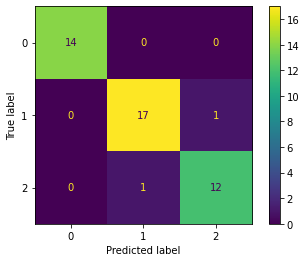

In [269]:
ConfusionMatrixDisplay(cf_matrix).plot()
plt.show()

We can see that the model is almost perfect in making the predictions for both the train and the test set: there is only 2 errors in prediction. 1 Virginica is being predicted as a Versicolor and vice versa.

In [270]:
# TEST
print("TEST SET")
print(classification_report(y_test, y_pred))

TEST SET
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.94      0.94        18
           2       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



The classification report shows the same picture: all but one (94%) of the versicolors are being recognized (recall for class 1) and 1/13 of the predicted virginica is actually virginica (precision for class 2).

---
These metrics provide us an overview of how well the model performs between true positives and false positives - but how can we adjust the model in order to strike the correct balance?

In [ ]:
if prediction > threshold -> class 1
elif prediction < threshold -> class 0 

### True Positive Rate, False Positive Rate, and ROC


TPR = \frac{\text{TP}{\text{TP+FN}} -> same as recall\
FPR = FP/FP+TN

Let's start with a simple example. Recall that logistic regression models make their decision about the class of some data point $x$ by computing the sigmoid function (for multiclass case, it's called a softmax function) :

$$\sigma(x) = \frac{1}{1+e^{-\beta \cdot x}}$$

and comparing this value to some threshold, usually set to $0.5$. More generally for any model this $0.5$ threshold means we put a point in class $1$ when our model believes it is slightly more likely to belong to class $1$. But what happens if we adjust this threshold? 

If we set the threshold lower, say $0.4$, we will get more class $1$ examples correct but we will also now incorrectly classify some class $0$ examples as class $1$. That is we increase the true positive rate and false positive rate. What if we do the reverse, and set the threshold at 0.6? We would get the reverse, both the true and false positive rates would decrease. 

By varying the threshold of the score at which we consider a point to be classified into the positive class, we can tailor our model to have higher precision or recall (and thus more or less true positives / true negatives) depending on the nature of the problem to which we are applying the classification model. This is a concept called "Threshold moving" 

For example, for our credit card transactions data, if the average value of a transaction is very, very, high, then perhaps we would wish to have high recall if letting a fraudulent transaction go undetected is very costly. In this case we would make the sacrifice of incorrectly positively identifying many legitimate transactions as fraudulent (_i.e._ have low precision / imprecise model) to prevent losing money on anything that we think *might* be fraud.

If, on the other hand, the average value of transactions was low, we may wish to have high precision and be very confident in our predictions at the cost of missing many fraudulent transactions with our classifier and incorrectly identifying them as legitimate. This might be an acceptable trade-off to make if we don't want to lose customers because of a poor customer experience of continually flagging transactions which are not fraudulent as being illegitimate.

Let's return to our dataset of credit card transactions, and see how varying this threshold affects the precision and recall of the model. Here we will use the `predict_proba` function of our logistic regression model to return the probability scores, then manually put the points in the positive or negative class using `np.where` and our chosen cut-off:

In [271]:
# Redefine the variables again with Credit dataset as they got overwritten in the previous exercise
X = credit.drop(columns="Class")
y = credit["Class"]

# Create a train/test split with 70% train, 30% test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

In [273]:
# Make probabilistic predictions (scores)
y_proba = credit_logit.predict_proba(X_test)[:,1]

# First calculate precision and recall using the default (0.5) cut-off
y_threshold = np.where(y_proba > 0.5, 1, 0)
print("Threshold of 0.5:")
print(f"Precision score: {precision_score(y_test, y_threshold)}")
print(f"Recall score: {recall_score(y_test, y_threshold)}")
print("")

# Calculate the same using a much lower cut-off (0.2)
y_threshold = np.where(y_proba > 0.2, 1, 0)
print("Threshold of 0.2:")
print(f"Precision score: {precision_score(y_test, y_threshold)}")
print(f"Recall score: {recall_score(y_test, y_threshold)}")

Threshold of 0.5:
Precision score: 0.8351648351648352
Recall score: 0.562962962962963

Threshold of 0.2:
Precision score: 0.7241379310344828
Recall score: 0.6222222222222222


Here we can see that setting the threshold much lower for the positive class has resulted in making our precision drop dramatically (because we now have incorrectly classified many points). However our recall has risen slightly as we've "cast such a wide net" that we've captured some fraudulent transactions that previously were incorrectly not identified as fraud.

Now let us consider the question - how do precision and recall behave as we vary the value of the threshold for our classifier? Is there an optimal threshold value to pick to maximize both?

We can vary the value of the threshold, compute values for precision and recall as we iterate over values of the threshold, and compare the results (note that we only need to make the predictions once, we are only varying the cut-off):

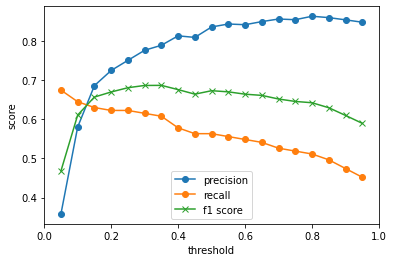

In [274]:
from sklearn.metrics import accuracy_score, f1_score

# Vary thresholds by 0.05 from 0.05 to 0.95
thresholds = np.arange(0.05, 1, 0.05)

precisions = list()
recalls = list()
f1score = []

for threshold in thresholds:

    # Apply threshold
    y_threshold = np.where(y_proba > threshold, 1, 0)
    
    # Calculate precision and recall
    precision = precision_score(y_test, y_threshold)
    recall = recall_score(y_test, y_threshold)
    f1 = f1_score(y_test, y_threshold)
    
    # Append to list
    precisions.append(precision)
    recalls.append(recall)
    f1score.append(f1)

# Visualize the result
plt.figure()
plt.plot(thresholds, precisions, label='precision', marker='o')
plt.plot(thresholds, recalls, label='recall', marker='o')
plt.plot(thresholds, f1score, label='f1 score', marker='x')
plt.xlim(0, 1)
plt.xlabel('threshold')
plt.ylabel('score')
plt.legend()
plt.show()

If we wanted to maximize both precision and recall in this case, it looks like we could choose a cut-off value of around 0.4.

This is great, however when we are trying to tune a model between false positives and negatives, it may be better to explicitly look at these metrics, instead of speaking in terms of only the positive class (as precision and recall measure). Related metrics to those of precision and recall are *true positive rate* and *false positive rate*.

The True Positive Rate (TPR) measures what proportion of a model assigned to positive are actually members of the positive class:

$$TPR = \frac{TP}{TP+FN}$$

Oh wait, we've already seen this, this is just recall, the proportion of positives that we correctly identified!



In [275]:
y_proba = credit_logit.predict_proba(X_test)[:,1]
y_binary = np.where(y_proba > 0.5, 1, 0)

TPR = recall_score(y_test, y_binary)
print(f"TPR: {TPR}")

TPR: 0.562962962962963


On the other hand, the False Positive Rate (FPR) will be the proportion of all negatives that we incorrectly identified as positive, that is:

$$FPR = \frac{FP}{FP+TN}$$


`sklearn` does not implement a False Positive Rate metric, so we have to write our own:

In [276]:
def false_positive_rate(y_true, y_pred):
    
    false_positives = (y_true == 0) & (y_pred == 1) # find all values where y is negative
                                                    # but we predicted positive
    false_positive_number = false_positives.sum()

    true_negatives = (y_true == 0) & (y_pred == 0)  # find all values where y is negative
                                                    # and we predicted negative
    true_negative_number = true_negatives.sum()

    # Finally, find the ratio of (FP) to (TN + FP)
    FPR = false_positive_number/(true_negative_number + false_positive_number)
    
    return FPR

In [277]:
y_proba = credit_logit.predict_proba(X_test)[:,1]
y_binary = np.where(y_proba > 0.5, 1, 0)

FPR = false_positive_rate(y_test, y_binary)
print(f"FPR: {FPR}")

FPR: 0.0001758334505556337


Before continuing with the credit data set lets investigate the noisy breast cancer dataset to better illustrate the effect of varying the threshold in the case of a more balanced dataset.

In [278]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [281]:
len(cancer.feature_names)

30

In [102]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [103]:
len(cancer.target)

569

In [282]:
from sklearn.datasets import load_breast_cancer

# Use the cancer dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# Add some noise to the data
random_state = np.random.RandomState(10)
n_samples, n_features = X.shape
X = X + (random_state.randn(n_samples, n_features) * 1000)

# Create a train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#Get the probability for each point in the test set.
classifier = LogisticRegression()
y_proba = classifier.fit(X_train, y_train).predict_proba(X_test)[:,1]
thresholds = np.linspace(0, 1, 100)


# Iterate over the thresholds and compute the positive and negative recall
true_positive_rates = []
false_positive_rates = []

thresholds = np.linspace(0, 1, 50)
for threshold in thresholds:
    
    # Apply the cutoff and calculate the positive and negative recall
    y_pred = np.where(y_proba > threshold, 1, 0)
    
    tpr = recall_score(y_test, y_pred)
    fpr = false_positive_rate(y_test, y_pred)
    
    true_positive_rates.append(tpr)
    false_positive_rates.append(fpr)

We can plot the True Positive Rate and the False Positive Rate against the threshold to see the effect of varying the cutoff. 

As the score cutoff becomes higher, our classifier decreases in false positive rate (less examples are incorrectly classified as positive falsely), but it also decreases in its ability to recall true positive cases.

Ideally we want a high TPR and a low FPR, but as many things in model optimization, there seems to be a trade-off.

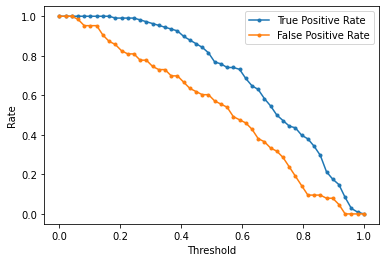

In [283]:
plt.figure()
plt.plot(thresholds, true_positive_rates, label='True Positive Rate', marker='.')
plt.plot(thresholds, false_positive_rates, label='False Positive Rate', marker='.')
plt.xlabel('Threshold')
plt.ylabel('Rate')
plt.legend()
plt.show()

Finally, we plot the *Receiver Operating Characteristic*, or ROC curve. The ROC is a graphical measure which compares the true positive and false positive rates of a binary model, as defined above.

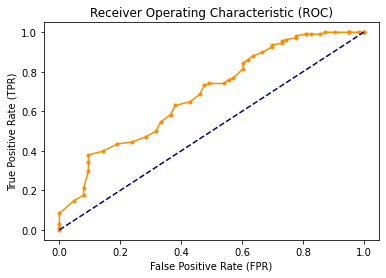

In [284]:
# True positive rate (TPR) = recall
tprs = np.array(true_positive_rates)

# False positive rate (FPR)
fprs = np.array(false_positive_rates)

plt.figure()
plt.plot(fprs, tprs, color='darkorange', marker='.')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.show()

A point at [1,1] means even though we have correctly classified ALL of the cancerous samples, we incorrectly classified ALL of the samples that were non-canerous\
What about when there is a point at [0,1]? What does this mean?
* This means that we have correctly classified 100% of the positive class (cancerous), and also 100% of the negative class (non-cancerous). In other wor,ds this threshold resulted in no False Positive

**The ROC graph summarizes all of the confusion matrices that each threshold produced**

An important point to note is that the ROC curve traces the path *as we vary the threshold* which is not depicted on the graph. We can see this in the figure below - as we vary the cutoff in the histogram of predicted scores (probabilities) on the left, it traces out the value with associated True Positive Rates and False Positive Rates in the plot on the right, drawing the ROC curve.

<center>
<img src="https://drive.google.com/uc?export=view&id=10hMa0rw1S6400OlYIiwwEVbDoHfVD4ON">
</center>

For convenience, there is the [sklearn.metrics.roc_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html) function to compute the thresholds, true positive rates, and false positive rates easily. Note that unlike other scoring functions in `metrics`, this function takes the *probability* scores calculated from `predict_proba` for the positive class, not the binary class predictions from `predict`. We can use this to easily draw the ROC curve for our imbalanced fraud dataset, as well as an associated metric, the AUC, or area under the curve:

In [285]:
# Reload the fraud data
X = credit.iloc[:,:-1]
y = credit.iloc[:,-1]

# Create a train/test split with 70% train, 30% test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

# Regenerate scores
y_proba = credit_logit.predict_proba(X_test)[:,1]

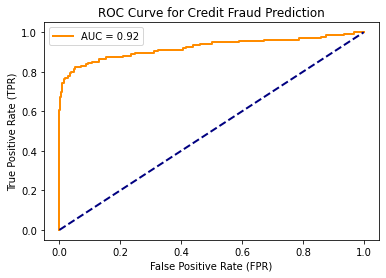

Area under curve (AUC):0.9226114002594519



In [286]:
from sklearn.metrics import roc_curve, roc_auc_score

fprs, tprs, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure()
plt.plot(fprs, tprs, color='darkorange',
         lw=2, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Credit Fraud Prediction')
plt.legend(loc="best")
plt.show()

print(f'Area under curve (AUC):{roc_auc}')
print()

Each point on the curve represents a tradeoff between true and false positive rates. If we're only willing to tolerate a false positive rate of $0.2$, then we can only achieve a true positive rate of ~$0.85$. On the other hand, if we were only permitting a very low false positive rate, we might have to settle for a lower true positive rate close to $0.6$. Conversely, we could allow a high false positive rate for a higher true positive rate and correctly classify nearly all positive examples. The diagonal line represents a random guess. It serves as a baseline to compare the curve against. When the curve is above it we are doing better than random choice, below we are doing worse.

Now that we have this curve, what can we do with it? As was the original motivation, it is useful for tuning acceptance thresholds. Say our test was measuring if an airplane required maintenance. We would much rather have a perfect true positive rate and several false positives than misclassify airplanes that were going to fail.

It can also provide a measure of model quality. We can do this by measuring the area under the ROC curve (or AUC score). 

To understand why this measure is useful, consider the following three examples. The best model will never make a misclassification, so it will have a true positive rate of $1.0$ and a false positive rate of $0$. It's ROC curve is the flat horizontal line at 1. The area under it is $1$. The worst classifier is then the horizontal line at 0, it has the inverse true and false positive rate of the best model, its AUC score is $0$. The random guessing classifier has an AUC score of $0.5$. The key observation here is a higher AUC score corresponds to a better ROC curve, thus we can measure the quality of a model with its AUC score.

**Tip**: A quick way to plot the ROC curve without looking at the actual values is using the `RocCurveDisplay.from_estimator` function.

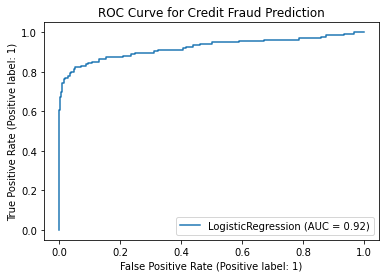

In [287]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(credit_logit, X_test, y_test)
plt.title('ROC Curve for Credit Fraud Prediction')
plt.show()

**Two Important Notes:**
1. ROC and AUC values are data dependent. If we change the underlying distribution, or even the points from the same distribution, the plots and values can significantly change.
2. We found the ROC curve and AUC score by fitting a model to a training set and evaluating it on a test set. If we had instead fitted and evaluated on the same set then we would likely be  making our evaluation and decisions on data we have overfitted to. This is akin to selecting the best performing model by using the accuracy on the training set.

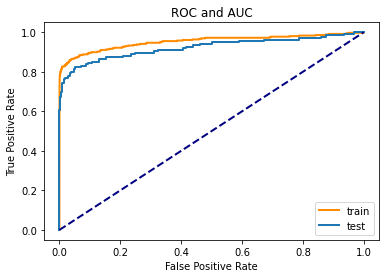

Test AUC score: 0.9226114002594519
Train AUC score: 0.9528264556210662


In [288]:
#Get the probability for each point in the train set.
y_proba_train = credit_logit.predict_proba(X_train)[:,1]

# Compute ROC curve and AUC for for the one class
fprs_train, tprs_train, thresholds_train = roc_curve(y_train, y_proba_train)
roc_auc_train = roc_auc_score(y_train, y_proba_train)
  
# Plot the ROC curve.
plt.figure()
plt.plot(fprs_train, tprs_train, color='darkorange', lw=2, label='train')
plt.plot(fprs, tprs, lw=2, label='test')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC and AUC')
plt.legend(loc="best")
plt.show()
print(f"Test AUC score: {roc_auc}")
print(f"Train AUC score: {roc_auc_train}")

As expected, the AUC score is higher.

### Using ROC and AUC

Besides using AUC (and hence the ROC) as an evaluation criteria is there anything else we can do with it? While AUC is usually correlated with accuracy, it is possible that we can choose between a model with a high AUC and lower accuracy and a model with a lower AUC and higher accuracy. Let's step back and see what each is measuring again:

1. Accuracy is measuring the fraction of points our model gets correct for a fixed threshold.
2. AUC is the probability that when our model is given two random points, one from the positive class and one from the negative class, our model is more confident that the positive point belongs to the positive class than the negative point belonging to the positive class.

We've seen accuracy is not always a great measure when our classes or highly skewed, this can lead us to a false sense of confidence. With AUC we are protected from class imbalances.

---
#### Exercise 2

1. Using the noisy cancer dataset get the AUC score and ROC curve of several classifiers, try logistic regression, decision trees, KNN etc... Note some of these classifiers, such as SVM, require you set `probability=True` when building the model, otherwise you will encounter an error. You should plot out the ROC curve and get the AUC score for both the train and test set.
2. Given the context of the data at what point do you think we should set the cutoffs of the various classifiers? Do you have enough information to answer this question?
---

In [289]:
from sklearn.datasets import load_breast_cancer

# Use the cancer dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# Add some noise to the data
random_state = np.random.RandomState(10)
n_samples, n_features = X.shape
X = X + (random_state.randn(n_samples, n_features) * 1000)

# Create a train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#### Solution

Our first step is to scale the data:

In [290]:
# Instantiate
ss = StandardScaler()

# Fit
ss.fit(X_train)

# Transform
X_train_ss = ss.transform(X_train)
X_test_ss = ss.transform(X_test)

Next, we will loop through four different models, fit them on the scaled data and plot the ROC curve for each:

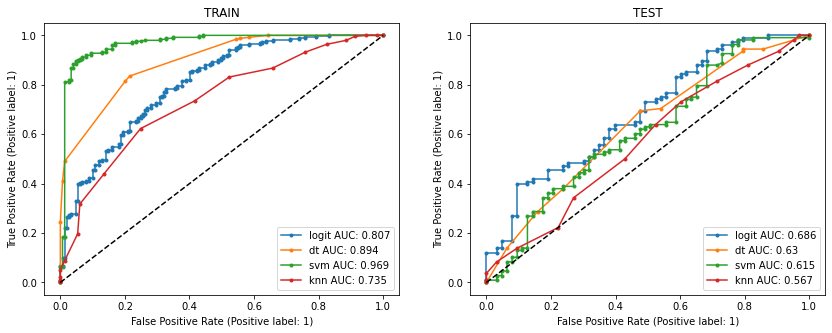

In [291]:
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Instantiate
models = [
    LogisticRegression(C=0.1), 
    DecisionTreeClassifier(max_depth=5), 
    SVC(probability=True),
    KNeighborsClassifier(n_neighbors=35)
]

modelnames = ['logit', 'dt', 'svm', 'knn']

fig, axes = plt.subplots(1,2, figsize=(14, 5))

for i in range(4):
    # Fit 
    models[i].fit(X_train_ss, y_train)

    # Predict probabilities
    y_proba_train = models[i].predict_proba(X_train_ss)[:,1]
    y_proba_test = models[i].predict_proba(X_test_ss)[:, 1]

    # Score (AUC)
    auc_train = np.round(roc_auc_score(y_train, y_proba_train), 3)
    auc_test = np.round(roc_auc_score(y_test, y_proba_test), 3)
    
    train_label = f'{modelnames[i]} AUC: {auc_train}'
    test_label = f'{modelnames[i]} AUC: {auc_test}'

    # Plot ROC curve
    # Using RocCurveDisplay - pass in the fitted model, then the X data, then the y data
    RocCurveDisplay.from_estimator(models[i], X_train_ss, y_train, ax=axes[0], marker='.', label=train_label)
    RocCurveDisplay.from_estimator(models[i], X_test_ss, y_test, ax=axes[1], marker='.', label=test_label)

axes[0].plot([0,1], [0,1], color='black', linestyle='--')
axes[1].plot([0,1], [0,1], color='black', linestyle='--')
axes[0].set_title('TRAIN')
axes[1].set_title('TEST')

plt.show()

We see that there are quite large difference between the training performance of these models however the test scores are quite similar. This signals that the models are possibly overfitting. In general, the Logistic Regresssion model has the highest area-under-the-curve for the test set with the decision tree and SVM second and third.

The ROC curve shows us the trade-off between false positives and true positives: for example in case of the LR model, we can achieve a 0.4 TPR at 0.1 FPR.

### Dealing with class imbalance

We have brought up the common problem of working with imbalanced data. Imbalanced data forces us to rely on other evaluation metrics than accuracy: precision, recall, F1 score, and area under the ROC curve all do a good job of giving us a better metric to evaluate our model. 

However, class imbalance can also cause an issue when training our models. Consider the cost function when the model is fitting on the training data. The cost function is going to be biased towards the majority class and will result in a model that doesn't learn enough about the minority class. 

Hope is not lost! We can correct for imbalance in a few ways and two common approaches are upsampling and downsampling. A very important note here is that which ever approach we apply should only be done to the training data! The test data should remain untouched and have class imbalance consistent with what you would expect the real world to be.

#### Upsampling/Oversampling

To potentially improve our model, we can "upsample" the minority class. This entails us resampling the observations that belong to the underrepresented class so that our training data consists of equal proportions of each class. Take the credit card example:

In [292]:
# upsample the credit card example
from sklearn.utils import resample

# Reload the credit data
X = credit.drop(columns="Class")
y = credit["Class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

# Upsample
print('Number of class 1 examples before:', X_train[y_train == 1].shape[0])

X_upsampled, y_upsampled = resample(X_train[y_train == 1], 
                                    y_train[y_train == 1], 
                                    replace=True, 
                                    n_samples=X_train[y_train == 0].shape[0], 
                                    random_state=123)

print('Number of class 1 examples after:', X_upsampled.shape[0])

# Combine upsample with original data
X_train_bal = np.vstack((X_train[y_train == 0], X_upsampled))
y_train_bal = np.hstack((y_train[y_train == 0], y_upsampled))

# Convert the X variable numpy array into a dataframe
X_train_bal = pd.DataFrame(X_train_bal, columns=X.columns)

Number of class 1 examples before: 357
Number of class 1 examples after: 199007


In [297]:
len(X_train_bal)/2

199007.0

*Note that in the code above we did not change the `y_train_bal` to a DataFrame as that would change the shape of the variable to (398014,1). The numpy array already keeps it in the proper shape i.e (398014,).*

With the balanced data we can train and evaluate our model. 

Confusion matrices: 



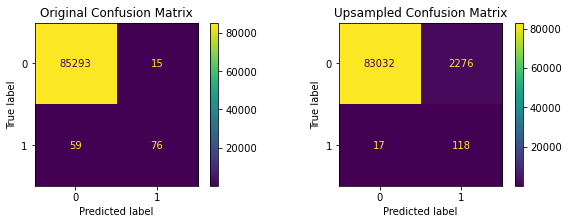


Original data classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.84      0.56      0.67       135

    accuracy                           1.00     85443
   macro avg       0.92      0.78      0.84     85443
weighted avg       1.00      1.00      1.00     85443


Upsampled data classification report: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     85308
           1       0.05      0.87      0.09       135

    accuracy                           0.97     85443
   macro avg       0.52      0.92      0.54     85443
weighted avg       1.00      0.97      0.98     85443



In [298]:
#####################
### MODEL FITTING ###
#####################

# on the original data
credit_logit = LogisticRegression(solver='lbfgs', random_state=1, max_iter=10000)
credit_logit.fit(X_train, y_train)

# evaluate on the original test set
y_pred = credit_logit.predict(X_test)

# classification report
report_initial = classification_report(y_test, y_pred)


# on the upsampled data
credit_logit_bal = LogisticRegression(solver='lbfgs', random_state=1, max_iter=10000)
credit_logit_bal.fit(X_train_bal, y_train_bal)

# evaluate on the original test set - NO UPSAMPLING
y_pred_bal = credit_logit_bal.predict(X_test) 

# classification report
report_upsampled = classification_report(y_test, y_pred_bal)


#####################
### PRINT RESULTS ###
#####################

print_line = "\n=======================================================\n"

# Confusion matrices
print("Confusion matrices:", print_line)

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

# Model on the original data
ConfusionMatrixDisplay.from_estimator(credit_logit, X_test, y_test, ax=axes[0])
axes[0].set_title('Original Confusion Matrix')

# Model on the upsampled data
ConfusionMatrixDisplay.from_estimator(credit_logit_bal, X_test, y_test, ax=axes[1])
axes[1].set_title('Upsampled Confusion Matrix')

plt.show()

# Classification Reports
print("\nOriginal data classification report:", print_line, report_initial)
print("\nUpsampled data classification report:", print_line, report_upsampled)

The precision for our model is substantially worse, but our recall has improved by a large margin. This is even better than what we could have achieved by adjusting our probability threshold. We are definitely learning more about our minority class and limiting the amount of false negatives. However, depending on our application, we may not be able to afford this decrease in precision. 

#### Downsampling

Similar to Upsampling, we can resample the majority class to have a smaller number of observations to balance out the classes instead of increasing the minority class. 

In [299]:
# downsample the credit card example

# Reload the credit data
X = credit.drop(columns="Class")
y = credit["Class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

# Upsample
print('Number of class 0 examples before:', X_train[y_train == 0].shape[0])

X_downsampled, y_downsampled = resample(X_train[y_train == 0], 
                                        y_train[y_train == 0], 
                                        replace=True, 
                                        n_samples=X_train[y_train == 1].shape[0], 
                                        random_state=123)

print('Number of class 0 examples after:', X_downsampled.shape[0])

# Combine upsample with original data
X_train_bal2 = np.vstack((X_train[y_train == 1], X_downsampled))
y_train_bal2 = np.hstack((y_train[y_train == 1], y_downsampled))

# Convert the X variable numpy array into a dataframe
X_train_bal2 = pd.DataFrame(X_train_bal2, columns=X.columns)

Number of class 0 examples before: 199007
Number of class 0 examples after: 357


In [300]:
len(X_train_bal2)

714

Confusion matrices: 



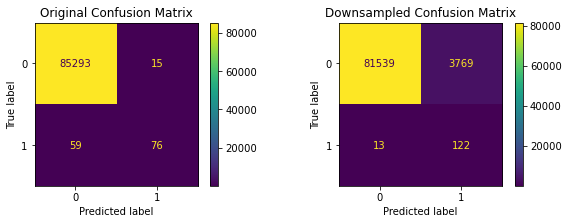


Original data classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.84      0.56      0.67       135

    accuracy                           1.00     85443
   macro avg       0.92      0.78      0.84     85443
weighted avg       1.00      1.00      1.00     85443


Upsampled data classification report: 
               precision    recall  f1-score   support

           0       1.00      0.96      0.98     85308
           1       0.03      0.90      0.06       135

    accuracy                           0.96     85443
   macro avg       0.52      0.93      0.52     85443
weighted avg       1.00      0.96      0.98     85443



In [301]:
#####################
### MODEL FITTING ###
#####################

# on the original data
credit_logit = LogisticRegression(solver='lbfgs', random_state=1, max_iter=10000)
credit_logit.fit(X_train, y_train)

# evaluate on the original test set
y_pred = credit_logit.predict(X_test)

# classification report
report_initial = classification_report(y_test, y_pred)

# on the upsampled data
credit_logit_bal2 = LogisticRegression(solver='lbfgs', random_state=1, max_iter=10000)
credit_logit_bal2.fit(X_train_bal2, y_train_bal2)

# evaluate on the original test set - NO UPSAMPLING
y_pred_bal2 = credit_logit_bal2.predict(X_test) 

# classification report
report_downsampled = classification_report(y_test, y_pred_bal2)


#####################
### PRINT RESULTS ###
#####################

print_line = "\n=======================================================\n"

# Confusion matrices
print("Confusion matrices:", print_line)

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

# Model on the original data
ConfusionMatrixDisplay.from_estimator(credit_logit, X_test, y_test, ax=axes[0])
axes[0].set_title('Original Confusion Matrix')

# Model on the upsampled data
ConfusionMatrixDisplay.from_estimator(credit_logit_bal2, X_test, y_test, ax=axes[1])
axes[1].set_title('Downsampled Confusion Matrix')

plt.show()

# Classification Reports
print("\nOriginal data classification report:", print_line, report_initial)
print("\Downsampled data classification report:", print_line, report_downsampled)

The above results suggest that downsampling performs even better if our goal was to increase recall. However our precision is particularly bad. 

#### Further approaches

Another technique that is out of scope for this lecture, but very powerful when dealing with class imbalance, is the Synthetic Minority Oversampling Technique (SMOTE). This approach generates synthetic training examples given your data and class imbalance. To read more on this approach, see the python library that implements SMOTE and other techniques: [imbalanced-learn](https://imbalanced-learn.org/stable/).

There is no rule of thumb when it comes to dealing with class imbalance. In practice, you have to apply many approaches and see which one works well for your data and problem. 

### Classification Model Evaluation Summary

We have covered quite a lot of new model evaluation metrics. The metrics can be expressed in terms of true positives, false positives, true negatives, and false negatives. With that said, often your model predictions will be a probability and in order to classify into positive or negative classes you need to use a probability threshold. By default sklearn often assumes a 50% threshold. It is important to note that all but one of the metrics below will change depending on this probability threshold.

A brief overview with notable points:

| Name | sk-learn.metrics |Description |
|:-----|:--|:--|
| Prediction Accuracy | `accuracy_score()` |<ul><li> Provides general information about how many examples are misclassified</li><li>Ranges from 0 to 1, 1 being a perfect fit meaning that 100 percent of the examples were predicted correctly</li><li>The most simple and intuitive classification metric, but less useful for datasets with class imbalance </li></ul> |
| Precision | `precision_score()`|<ul><li>The fraction of positive predictions that are correct</li><li>Ranges from 0 to 1, with 1 being a perfect fit</li><li>Optimizing precision emphasizes the correctness of your positive predictions. High Precision suggests if your model predicts fraud you are very certain it is fraud. In other words you have very few false positives (Type I errors)</li><li>Complimentary to Recall when the focus is on the positive class (i.e. "Fraud" instead of "Not Fraud")</li><li>An important metric to consider when you care more about not making false positives. ex. Drilling Oil wells, Hiring New employees, Convicting somebody of murder, Email Spam  </li></ul>|
| Recall/<br>True Positive Rate/<br>Sensitivity | `recall_score()` | <ul><li>The fraction of positive cases which were predicted as positive</li><li>Ranges from 0 to 1, with 1 being a perfect fit</li><li>Optimizing recall minimizes the chance of missing a positive prediction (Limits False negatives/Type II errors). In other words, having a high recall makes sure you capture the positive class</li><li> Synonymous with Sensitivity, True Positive Rate, Probability of Detection, Power. </li><li> An important metric to consider when you care more about not making false negatives. Ex. Cancer diagnosis, Signing a Pro Athlete, Safety Inspections </li></ul> |
| F1 Score | `f1_score()` | <ul><li>The harmonic mean of the precision and recall</li><li>Ranges from 0 to 1, with 1 being a perfect fit </li><li> An important metric to consider when you care about the positive class in both precision and recall equally </li></ul>
| False Positive Rate | `roc_curve()` | <ul><li>The fraction of incorrect positive predictions over all the true negatives</li><li>Ranges from 0 to 1, with 1 being a terrible fit implying that all the negative examples were incorrectly classified as positives</li><li>The False positive rate is complimentary to recall/true positive rate, but unlike precision it is related to the negative class </li><li> Synonymous with 1 - Specificity </li><li>  It is an important metric to consider when you care about the negative class but is more often not optimized directly, but through AUC </li></ul> |
| Area under the ROC curve (AUC) | `roc_auc_score()` | <ul><li>The area under the receiver operating characteristic curve which is the curve formed from plotting TPR and FPR at various probability thresholds</li><li>Ranges from 0 to 1, with an uninformative classifier yielding 0.5 and a perfect classifier yielding 1</li><li>The AUC is advantageous as a performance metric because it captures both the performance in the negative and positive class unlike the F1 score. It also is unique in that it does not change depending on the probability threshold, because it is calculated looking at all of the thresholds</li><li> Can be interpreted as the probability that a classifier will rank a randomly chosen positive instance higher than a randomly chosen negative one  </li><li>  One downside is that it simplifies the ROC curve into a single number when often your classification should be thought of as a trade off between TPR and FPR </li></ul> |



## Regression Model Evaluation

Our model evaluation metrics above have all been focused on classification. In order to calculate Accuracy, Precision, Recall, AUC, etc. we need to have a categorical label that we are predicting. In the continuous world, it is trivial to see if the `y` we predicted is the exact value. If I trained a model to predict house price, there is a notable difference if my predicted price is \\$50 off or \\$5,000,000 off from the true value. In other words, our evaluation metric needs to capture not only if we are wrong, but by how much.

There are many metrics to choose from both conceptually and what is available in the scikit learn metrics module. The three most common and what we will briefly discuss are tabulated below. The choice can often depend on the loss function of your model, or what is most meaningful for your application. 

| Metric | Name | sk-learn.metrics |Description |
|:--|:--|:--|:--|
|$R^2$ | Coefficient of Determination | `r2_score()` |<ul><li>Proportion of variance in the dependent variable that is predicted by the independent variables</li><li>Typically ranges from 0 to 1, with 1 being a perfect fit and 0 being no better than predicting the dependent variable with its mean</li><li>Relative measure of goodness of fit</li></ul> |
| RMSE | Root Mean Squared Error | `mean_squared_error(squared = False)`|<ul><li>The standard deviation of the residuals</li><li>Ranges from 0 to infinity, with 0 being a perfect fit and the larger the number the more error</li><li>Absolute measure of goodness of fit, and therefore cannot be used to compare across different data sets, but between models with the same dataset</li><li>Same units as the dependent variable. </li><li>Predictions farther away have a greater impact on the RMSE and is therefore sensitive to outliers</li></ul>|
| MAE | Mean Absolute Error | `mean_absolute_error()` | <ul><li>The average absolute values of the errors between the true value and the predicted value</li><li>Similar to RMSE, Ranges from 0 to infinity with 0 being a perfect fit and is an absolute measure of fit</li><li>Predicted values father away contribute proportionally to the MAE and is therefore more robust to outliers than RMSE </li><li>Relatively intuitive and simple to explain regression metric. </li></ul>

A typical regression-based ML model will predict continuous values (think about predicting house prices, number of rainfall per day, etc) 

Our primary objective is make sure that the predicted values are as close as possible to the actual values

Let's define some terms:
$$\text{actual values} = y \\ 
\text{predicted values} = \hat{y}$$

$$\text{Residual Error}= y - \hat{y}$$

When our residual error = 0, that means we have a perfect model (but that's never going to happen)

## What is Mean Squared Error (MSE)?

MSE measures the average squared difference between the predicted values and the actual values.\
Intuitively, the MSE is used to measure the quality of the model based on the predictions made on the entire dataset. 

![MSE](https://vitalflux.com/wp-content/uploads/2020/09/Regression-terminologies-Page-2.png)

The formula for MSE can be defined as $$\frac{1}{n}\sum{}{}(y-\hat{y})^2$$

Take the following example...

In [154]:
model_A_labels = [10, 16, 13, 19, 7]
model_A_predictions = [7, 14, 17, 20, 4]
model_A_errors = np.subtract(model_A_labels, model_A_predictions)
model_A_sqerrors = model_A_errors**2

pd.DataFrame(list(zip(model_A_labels, model_A_predictions, model_A_errors, model_A_sqerrors)), columns=['Actual','Predicted','Residual Error', 'Squared Residual Error'])

,Actual,Predicted,Residual Error,Squared Residual Error
0,10,7,3,9
1,16,14,2,4
2,13,17,-4,16
3,19,20,-1,1
4,7,4,3,9


In [156]:
model_A_MSE = sum(model_A_sqerrors) / len(model_A_labels)
print('Model A MSE:', model_A_MSE)

Model A MSE: 7.8


In [158]:
model_B_labels = [10, 16, 13, 19, 7]
model_B_predictions = [13, 20, 12, 18, 3]
model_B_errors = np.subtract(model_B_labels, model_B_predictions)
model_B_sqerrors = model_B_errors**2

pd.DataFrame(list(zip(model_B_labels, model_B_predictions, model_B_errors, model_B_sqerrors)), columns=['Actual','Predicted','Residual Error', 'Squared Residual Error'])

,Actual,Predicted,Residual Error,Squared Residual Error
0,10,13,-3,9
1,16,20,-4,16
2,13,12,1,1
3,19,18,1,1
4,7,3,4,16


In [302]:
model_B_MSE = sum(model_B_sqerrors) / len(model_B_labels)
print('Model B MSE:', model_B_MSE)

Model B MSE: 8.6


Model A is better because is has lower MSE! 

#### Now that we know what MSE is, RMSE is just the root of the MSE! 

In [163]:
print('Model A RMSE:', np.sqrt(model_A_MSE), '\nModel B RMSE:', np.sqrt(model_B_MSE))

Model A RMSE: 2.792848008753788 
Model B RMSE: 2.932575659723036


## MAE

The formula for MSE can be defined as $$\frac{1}{n}\sum{}{}|y-\hat{y}|$$

Similar to RMSE in that the lower the value, the better the model is

## What is the difference between RMSE and MAE?
1. RMSE is more sensitive to outliers
2. RMSE penalises large errors more than MAE due to the fact that errors are squared initially
3. MAE returns values that are more interpretable as it is simply the average of absolute error

Let's look at an example of house price prediction

In [303]:
Actual = [100000, 200000, 150000, 180000, 120000]
Prediction = [250000, 210000, 155000, 178000, 121000]
df = pd.DataFrame(list(zip(Actual, Prediction)), columns=['Actual', 'Prediction'])
df['Absolute Error'] = abs(df.Actual-df.Prediction)
df['Squared Error'] = (df.Actual-df.Prediction)**2
df

,Actual,Prediction,Absolute Error,Squared Error
0,100000,250000,150000,22500000000
1,200000,210000,10000,100000000
2,150000,155000,5000,25000000
3,180000,178000,2000,4000000
4,120000,121000,1000,1000000


In [304]:
MAE = sum(df['Absolute Error']/len(df))
RMSE = np.sqrt(sum(df['Squared Error'])/len(df))
print('MAE:', MAE, '\nRMSE:', RMSE)

MAE: 33600.0 
RMSE: 67275.55276621664


Both metrics are returning the error on the same scale as the house prices we are predicting, but the RMSE is higher as there are outliers in the dataset which increase the magnitude of the error.

## How to interpret RMSE and MAE?
MAE is interpreted as the average error when making a prediction with the model.\
RMSE can be interpreted as the average weighted performance of the model, where a larger weight is added to outlier predictions.

## When to use RMSE or MAE?

It depends on if and how much you want to penalise large errors. If your use case demands that occasional large mistakes in your predictions need to be avoided then use RMSE.\
However, if you want an error metric that treats all errors equally and returns a more interpretable value then use MAE.

## What is R^2

The coefficient of determination, or $r^2$ is a measure that provides information about the goodness of fit of a model. It is a measure of how well the regression line approximates the actual data.\
It is defined as follows:

$$\text{R}^2 = 1 - \frac{\text{sum squared regression(SSR)}}{\text{total sum of squares (SST)}} \\ = 1 - \frac{\sum(y-\hat{y})^2}{\sum(y-\bar{y})^2}$$

In [305]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [306]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston

X = load_boston()['data'].copy()
y = load_boston()['target'].copy()

print('Feature Names:', load_boston()['feature_names'])
print(X.shape)

linear_regression = LinearRegression()
linear_regression.fit(X,y)

prediction = linear_regression.predict(X)

def rsquared(y_true, y_hat):
    y_bar = np.mean(y_true)    
    ss_total = np.sum((y_true - y_bar) ** 2)
    ss_explained = np.sum((y_hat - y_bar) ** 2)
    ss_residual = np.sum((y_true - y_hat) ** 2)
    
    return 1 - (ss_residual / ss_total)


Feature Names: ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
(506, 13)


In [232]:
rsquared(y, prediction)

0.7406426641094095

We can interpret the value above like this: 74% of the variation in the y values is accounted for by the x values.

### This is great! But... there is a downside to R^2

Specifically, as we add new predictors to the regression model, R^2 increases or remains the same. This is the case even when the new predictors are independent of our response variable and don't add any value to the predicting power of the model.

#### To alleviate this issue, we use **adjusted R^2**

The formula is: $$ \bar{R}^2 = 1 - \frac{{(1 - R^2)(n - 1)}}{{n - k - 1}} $$

Let's see this in an example:

Here, we'll add 3 additional features named ‘random1’, ‘random2’ and ‘random3’ containing random numbers.\
Then, we'll calculate the mutual information scores of the features and incrementally add one feature at a time to the model in the decreasing order of the mutual information scores and compute the R-squared and adjusted R-squared.

**Bonus Question: What is mutual information score?**

In [307]:
from sklearn.feature_selection import mutual_info_regression

df = pd.DataFrame(load_boston()['data'], columns=load_boston()['feature_names'])
df['y'] = load_boston()['target']

df['RAD'] = df['RAD'].astype('int')
df['CHAS'] = df['CHAS'].astype('int')

X = df.drop(columns='y').copy()
y = df['y'].copy()

np.random.seed(11)
X['random1'] = np.random.randn(len(X))
X['random2'] = np.random.randint(len(X))
X['random3'] = np.random.normal(len(X))

mutual_info = mutual_info_regression(X, y, discrete_features=X.dtypes == np.int32)
mutual_info = pd.Series(mutual_info, index=X.columns)
mutual_info.sort_values(ascending=False, inplace=True)
mutual_info

LSTAT      0.667868
RM         0.528050
INDUS      0.466544
NOX        0.465254
PTRATIO    0.434514
TAX        0.361041
CRIM       0.341827
AGE        0.309333
DIS        0.300009
RAD        0.210613
ZN         0.198132
B          0.159204
CHAS       0.020946
random1    0.000000
random2    0.000000
random3    0.000000
dtype: float64

In [308]:
r2 = rsquared(y, prediction)
print(r2)

0.7406426641094094


In [309]:
result_df = pd.DataFrame()
for i in range(1, len(mutual_info) + 1):
    X_new = X.iloc[:, :i].copy()
    linear_regression = LinearRegression()
    linear_regression.fit(X_new, y)
    
    prediction = linear_regression.predict(X_new)
    r2 = rsquared(y, prediction)
    adj_r2 = 1 - ((1 - r2) * (len(X) - 1) / (len(X) - i - 1))
    
    result_df = result_df.append(pd.DataFrame({'r2': r2,
                                              'adj_r2': adj_r2}, index=[i]))

result_df

,r2,adj_r2
1,0.150780,0.149096
2,0.233988,0.230943
3,0.293714,0.289493
4,0.329528,0.324175
5,0.331313,0.324626
6,0.587377,0.582416
7,0.589490,0.583720
8,0.631149,0.625212
9,0.631948,0.625269
10,0.639663,0.632383


Here we observe, that in row 14,15,16 where the random data was added, the adjusted R-squared value decreases. However, R-squared remained the same

### When to use R-squared or adjusted R-squared?

You'll always want to use adjusted R-squared

# Bias and Variance 

Now we will look at where our model errors come from. We will decompose our error into two (actually three) terms. This section is a bit theoretical so we will take it slowly.

What are we doing when fitting models? We're trying to learn a relation between the dependent variable $Y$ and independent variable $X$. This relation is some arbitrary function $f$ (and some noise term $\epsilon$):

$$ Y = f(x) + \epsilon $$

When doing any statistical modeling we are estimating $f(x)$ using $\hat{f}(x)$, this $\hat{f}$ can be any arbitrary model, this includes KNN or SVMs for classification problems or \
linear regression for regression problems. The error in our model is the difference between the relation $f(x)$ and our model $\hat{f}(x)$. 

A good model should be close to the underlying relation while a bad model would be far away. When fitting our models we can't find the distance between our model and the true relation,\
since if we knew the true relation we wouldn't need to bother modeling it. Instead we use some training and validation data to see how well our estimate $\hat f$ explains the data. 

The choice of model and choice of data can have a huge impact on our ability to estimate the true function $f(x)$: 
- a model which is too weak will fail to capture the underlying relation, and 
- one that is too flexible will pick up on the noise $\epsilon$ and the patterns only present in subsets of the data it is exposed too.

Consider the following example, each blue dot represents a realization of a model, fitted with different data, and the red dot represents the ideal relation:

<img src = "https://drive.google.com/uc?export=view&id=1KcdzSUtz73mocfwE_wfC5AcKxJoo5r4e" width=400px>

<center><em>Bias-Variance diagram courtesy of <a href="http://scott.fortmann-roe.com/docs/BiasVariance.html">Scott Fortmann-Roe</a></em></center>

Each sub-plot represents a different model, some models are good, some are bad. But they all make errors in a different way. Here we break down the types of errors a model can make into two terms:

1. **Bias**: Bias is about the ability to capture the true patterns in the dataset.
* A high bias means a model is not powerful enough to find the patterns in the data, it learns poor representations. In other words, it fails to capture the true relationship of the data
* A low bias means a model is overly complex and has tend to "memorize" the data and has poor generalization on the test set. In other words, it is overfitting the training data
2. **Variance**: The sensitivity of the model to changes in the data. 
* A high variance model means it is too powerful to fit the patterns in the data and has instead fitted to the noise. A model with high variance has massive swings in its predictions with only minor changes in the underlying data.
* A low variance model is more stable in it's predictions when there is minor changes in the underlying data

Some of these models have low bias and low variance some have high bias and high variance, some have a mixture of the two. How would you label the error of each model here?

### Example of high bias:

![high bias](https://miro.medium.com/v2/resize:fit:1400/1*a9FmRnqAiORKgVU7Yc1FMg.jpeg)

## Example of high variance:

![high variance](https://miro.medium.com/v2/resize:fit:1400/1*I__XWjoKVD6TF76Un-_t0g.jpeg)

We see that they are all almost as good, or bad, as each other.

So what does this mean from a performance perspective? Since our total error is affected by both terms optimizing to minimize bias or variance alone is not a good idea. Instead we must trade one for the other and end up at some ideal middle ground. It can help to visualize the error as a plot:

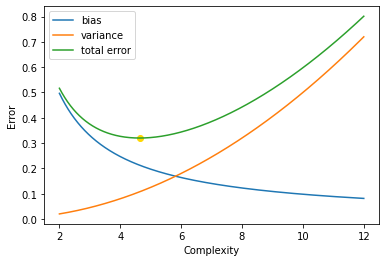

In [310]:
complexity = np.arange(2,12, .001)
bias = 1/(complexity**1.01)
variance = (complexity)**2/200

total_error = bias+variance

min_total = total_error.argmin()

plt.plot(complexity, bias, label="bias")
plt.plot(complexity, variance, label="variance")
plt.plot(complexity, total_error, label="total error")

plt.scatter(complexity[min_total], total_error[min_total], color = "gold")

plt.legend()
plt.xlabel("Complexity")
plt.ylabel("Error")

plt.show()

In [ ]:
total error = bias^2 + variance + irreducible error 

### How do we fix high bias?

1. Add more input features
2. Add more complexity by introducing polynomial features 
3. Decrease regularization term. 


### How do we fix high variance?

1. Reduce input features
2. Increase Regularization term
3. Get more training data

Essentially we are trying to tune our model complexity so that we end up at the gold dot, this is the best model we can hope for. In reality we don't know how the error due to bias and variance change as we adjust the model complexity, we know that they decrease and increase as the models become more complex but we don't know the exact pattern to the change.

This has been a bit of a theoretical section on where errors come from, but it should help you understand that a model that is too complex (high variance low bias) is not good, while a model that is too simple (high bias low variance) is not good either. In the language of machine learning, you can think of this as finding a balance between a model that overfits (high variance) and a model that underfits (high bias). 

<div id="container" style="position:relative;">
<div style="position:relative; float:right"><img style="height:25px""width: 50px" src ="https://drive.google.com/uc?export=view&id=14VoXUJftgptWtdNhtNYVm6cjVmEWpki1" />
</div>
</div>